In [1968]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Data Import

In [2714]:
#import training df
train = pd.read_csv('diabetes_train.csv')

In [2715]:
train #take a look

,Id,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age,diabetes
0,358,13,129,0,30,0,39.9,0.569,44,1
1,74,4,129,86,20,270,35.1,0.231,23,0
2,353,3,61,82,28,0,34.4,0.243,46,0
3,498,2,81,72,15,76,30.1,0.547,25,0
4,146,0,102,75,23,0,0.0,0.572,21,0
...,...,...,...,...,...,...,...,...,...,...
571,72,5,139,64,35,140,28.6,0.411,26,0
572,107,1,96,122,0,0,22.4,0.207,27,0
573,271,10,101,86,37,0,45.6,1.136,38,1
574,436,0,141,0,0,0,42.4,0.205,29,1


In [2716]:
#preview our training data
train.info()
train.describe()
#observations: no null values...looks like there are some zeroes though

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 10 columns):
Id                    576 non-null int64
num_times_pregnant    576 non-null int64
plasma_glucose        576 non-null int64
DBP                   576 non-null int64
triceps_skin          576 non-null int64
serum_insulin         576 non-null int64
BMI                   576 non-null float64
pedigree              576 non-null float64
age                   576 non-null int64
diabetes              576 non-null int64
dtypes: float64(2), int64(8)
memory usage: 45.1 KB


,Id,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age,diabetes
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,389.411458,3.741319,120.659722,69.505208,20.494792,80.362847,31.981771,0.468618,32.921875,0.345486
std,221.218135,3.305452,32.133182,18.399810,15.424655,116.223541,7.622203,0.339325,11.507539,0.475940
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,194.250000,1.000000,99.000000,64.000000,0.000000,0.000000,27.000000,0.240000,24.000000,0.000000
50%,393.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.000000,0.372500,29.000000,0.000000
75%,576.250000,6.000000,138.250000,80.000000,32.000000,127.500000,36.325000,0.612250,40.000000,1.000000
max,768.000000,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## EDA

C:\Users\ianno\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ianno\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


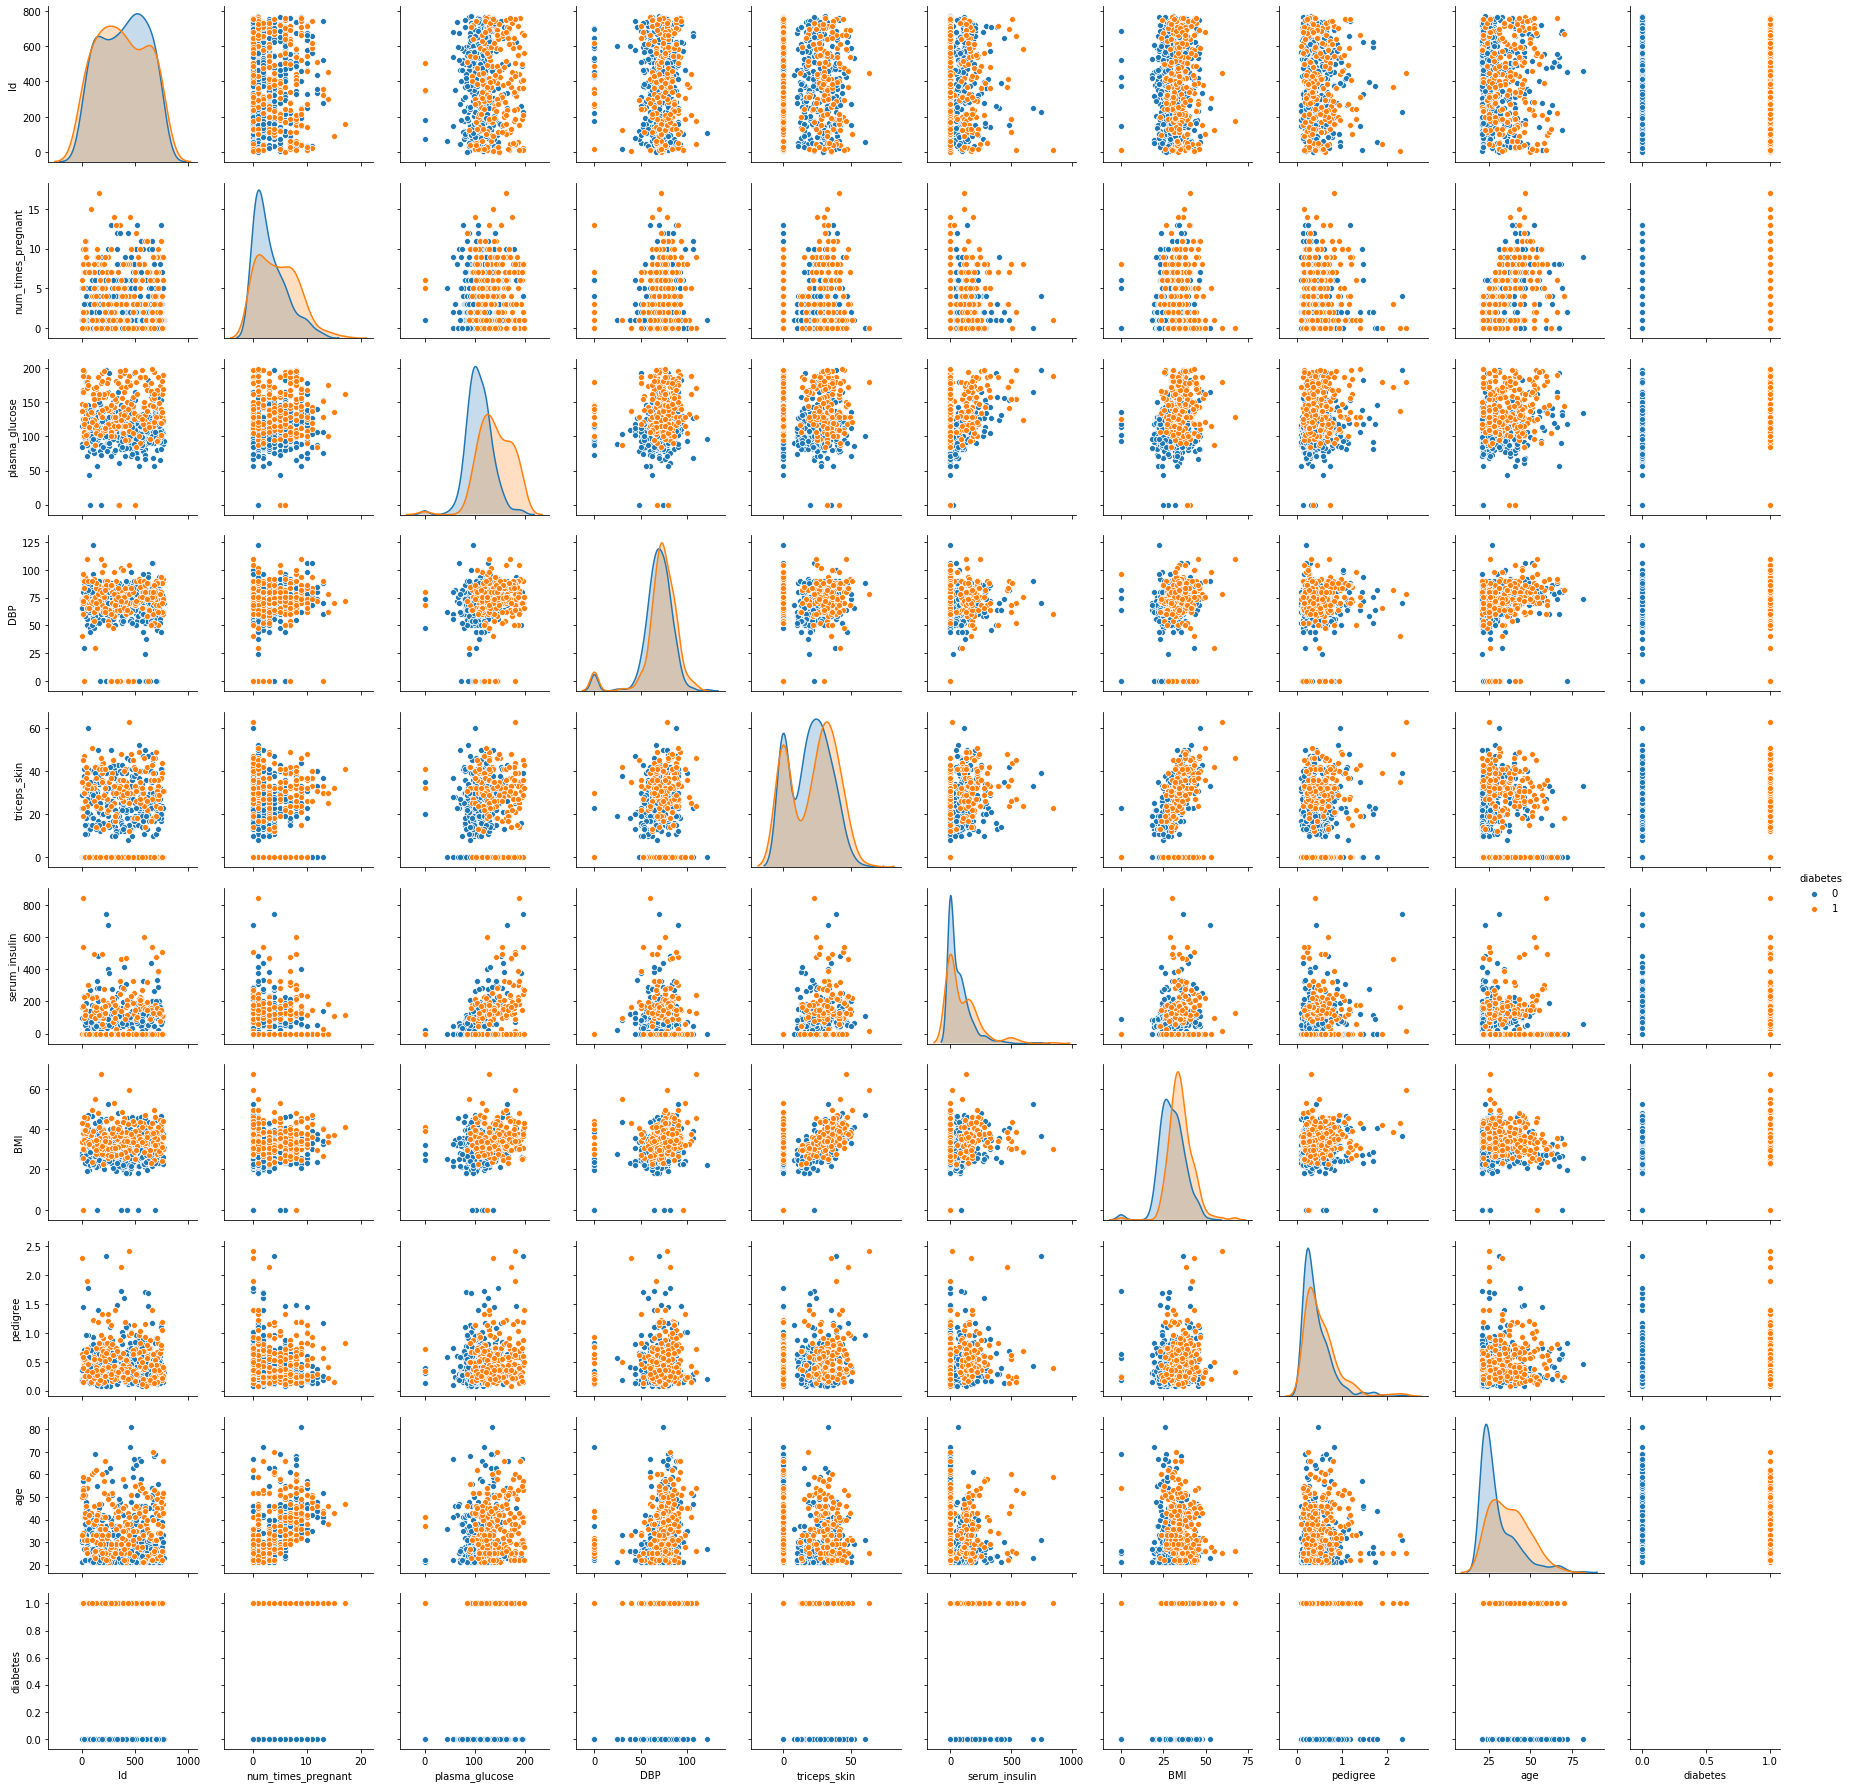

In [2717]:
#pairs plot (inspect if we even need to scale)
sns.pairplot(train, hue='diabetes')

0    0.654514
1    0.345486
Name: diabetes, dtype: float64

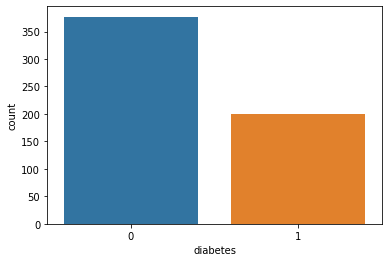

In [2718]:
#explore our target (diabetes diagnosis)
sns.countplot(x='diabetes', data=train)

train['diabetes'].value_counts(normalize=True) #shows % split

#observations: we have about a 65:35 split...resampling is a possibility here (perhaps explore this at the end)

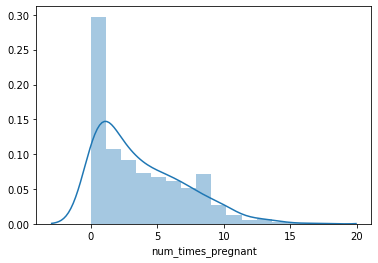

In [2719]:
#explore pregnancies
sns.distplot(train['num_times_pregnant'])
#observations: many zeroes...these are legit though

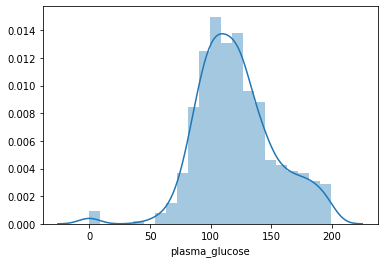

In [2720]:
#explore plasma glucose
sns.distplot(train['plasma_glucose'])
#observations: bimodal...the few zeroes should not really exist here...(impute)

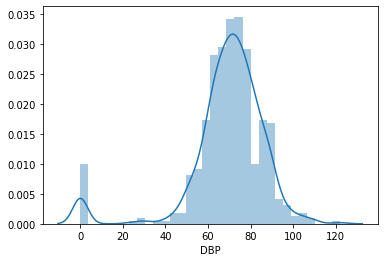

In [2721]:
#explore DBP
sns.distplot(train['DBP'])
#observations: bimodal...zeroes should also probably not exist here (impute)

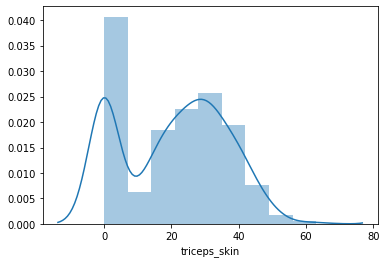

In [2722]:
#explore triceps_skin
sns.distplot(train['triceps_skin'], label=train['diabetes'])
#observations: also bimodal...impute zeroes with mean here as well

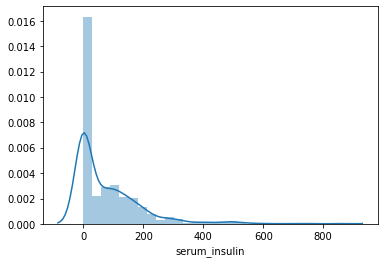

In [2723]:
#explore serum_insulin
sns.distplot(train['serum_insulin'])
#observations: many zeroes here as well, impute

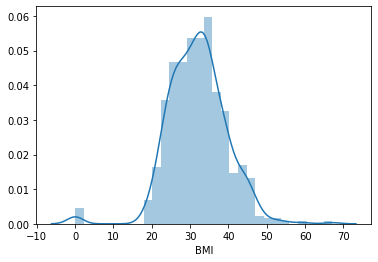

In [2724]:
#explore BMI
sns.distplot(train['BMI'])
#observations: clear mistakes here (everyone has a BMI) - impute these zeroes (can't have a 0 BMI)

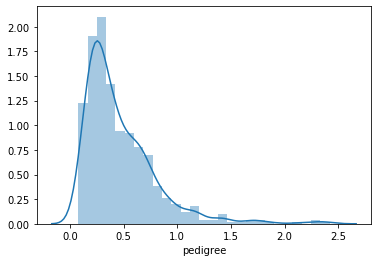

In [2725]:
#explore pedigree
sns.distplot(train['pedigree'])
#observations: skewed, some outliers

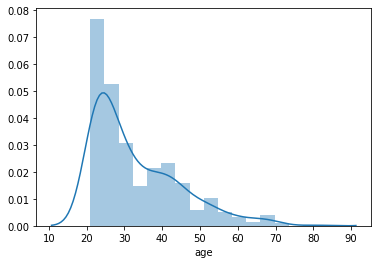

In [2726]:
#explore age
sns.distplot(train['age'])
#observations: most testees were younger, some old ppl that skew the distribution

## Pre-Processing

In [2368]:
#Cleaning
#Transforming/Scaling (MinMaxScaler)
#Balancing

In [2727]:
train.info()
#nice - we have no standard NULL values to impute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 10 columns):
Id                    576 non-null int64
num_times_pregnant    576 non-null int64
plasma_glucose        576 non-null int64
DBP                   576 non-null int64
triceps_skin          576 non-null int64
serum_insulin         576 non-null int64
BMI                   576 non-null float64
pedigree              576 non-null float64
age                   576 non-null int64
diabetes              576 non-null int64
dtypes: float64(2), int64(8)
memory usage: 45.1 KB


In [2728]:
train.describe()
#observations: as we noticed in EDA, however, there are attributes that have suspect 0 values

,Id,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age,diabetes
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,389.411458,3.741319,120.659722,69.505208,20.494792,80.362847,31.981771,0.468618,32.921875,0.345486
std,221.218135,3.305452,32.133182,18.399810,15.424655,116.223541,7.622203,0.339325,11.507539,0.475940
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,194.250000,1.000000,99.000000,64.000000,0.000000,0.000000,27.000000,0.240000,24.000000,0.000000
50%,393.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.000000,0.372500,29.000000,0.000000
75%,576.250000,6.000000,138.250000,80.000000,32.000000,127.500000,36.325000,0.612250,40.000000,1.000000
max,768.000000,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [2729]:
#ZERO VALUES
#for some features a 0 is valid (e.g., # times pregnant), but for some it isnt (plasma_glucose, DBP, triceps, serum, BMI) - impute

#start with plasma_glucose (first replace zeroes with NA, then replace NA with the updated mean)
train['plasma_glucose'].replace(0, np.NaN, inplace=True)
train['plasma_glucose'].fillna(value=train['plasma_glucose'].mean(), inplace=True)

In [2730]:
#now DBP
train['DBP'].replace(0, np.NaN, inplace=True)
train['DBP'].fillna(value=train['DBP'].mean(), inplace=True)

#now triceps_skin
train['triceps_skin'].replace(0, np.NaN, inplace=True)
train['triceps_skin'].fillna(value=train['triceps_skin'].median(), inplace=True)

#now serum_insulin
train['serum_insulin'].replace(0, np.NaN, inplace=True)
train['serum_insulin'].fillna(value=train['serum_insulin'].median(), inplace=True)

#now BMI
train['BMI'].replace(0, np.NaN, inplace=True)
train['BMI'].fillna(value=train['BMI'].median(), inplace=True)

In [2731]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 10 columns):
Id                    576 non-null int64
num_times_pregnant    576 non-null int64
plasma_glucose        576 non-null float64
DBP                   576 non-null float64
triceps_skin          576 non-null float64
serum_insulin         576 non-null float64
BMI                   576 non-null float64
pedigree              576 non-null float64
age                   576 non-null int64
diabetes              576 non-null int64
dtypes: float64(6), int64(4)
memory usage: 45.1 KB


In [2732]:
#drop unnecessary variables (Id)
train.drop('Id', axis=1, inplace=True)

In [2733]:
train.head()

,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age,diabetes
0,13,129.0,72.265343,30.0,121.0,39.9,0.569,44,1
1,4,129.0,86.000000,20.0,270.0,35.1,0.231,23,0
2,3,61.0,82.000000,28.0,121.0,34.4,0.243,46,0
3,2,81.0,72.000000,15.0,76.0,30.1,0.547,25,0
4,0,102.0,75.000000,23.0,121.0,32.0,0.572,21,0


## Feature Engineering

In [2734]:
####drop unimportant features
#train.drop(['num_times_pregnant','DBP','triceps_skin'], axis=1, inplace=True)

## Train/Test Split

In [2735]:
#following a standard holdout method
from sklearn.model_selection import train_test_split

In [2736]:
#define X (features) and y (target)
X = train.drop('diabetes', axis=1)
y = train['diabetes']

In [2737]:
#split our data into train/test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1024, stratify=y)
    #observations: we've added in stratifying to ensure imbalance is even across train and test

In [2738]:
#preview training features
X_train #460 instances

,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age
458,6,93.0,50.000000,30.0,64.0,28.7,0.356,23
58,1,95.0,82.000000,25.0,180.0,35.0,0.233,43
416,0,98.0,82.000000,15.0,84.0,25.2,0.299,22
335,1,81.0,72.000000,18.0,40.0,26.6,0.283,24
30,1,101.0,50.000000,15.0,36.0,24.2,0.526,26
...,...,...,...,...,...,...,...,...
301,3,142.0,80.000000,15.0,121.0,32.4,0.200,63
243,7,97.0,76.000000,32.0,91.0,40.9,0.871,32
40,5,105.0,72.000000,29.0,325.0,36.9,0.159,28
0,13,129.0,72.265343,30.0,121.0,39.9,0.569,44


In [2739]:
#check the spread of our targets from train to test set...even because of stratified sampling
y_train.value_counts()
y_test.value_counts()

0    301
1    159
Name: diabetes, dtype: int64

0    76
1    40
Name: diabetes, dtype: int64

## Scaling Features

In [2740]:
#now that we've completed our train and test split, we will scale our features using MinMaxScaler
#this will help some of our distance-based ML models (SVC for ex)
#we will fit and transform on our training split, and then FIT ONLY on our testing set (and later official test set)

In [2741]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [2742]:
#fit the minmax scaler to our training set
scaled_features = scaler.fit_transform(X_train)

In [2743]:
X_train = pd.DataFrame(scaled_features, columns=X_train.columns)

In [2744]:
X_train #here's our scaled X_train

,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age
0,0.708949,-0.948770,-1.825711,0.176764,-0.811641,-0.503115,-0.322188,-0.839115
1,-0.816386,-0.882459,0.787644,-0.410747,0.435994,0.426987,-0.689938,0.882915
2,-1.121453,-0.782991,0.787644,-1.585769,-0.596531,-1.019838,-0.492608,-0.925217
3,-0.816386,-1.346639,-0.029029,-1.233262,-1.069772,-0.813149,-0.540446,-0.753014
4,-0.816386,-0.683524,-1.825711,-1.585769,-1.112794,-1.167473,0.186085,-0.580811
...,...,...,...,...,...,...,...,...
455,-0.206252,0.675862,0.624310,-1.585769,-0.198579,0.043135,-0.788602,2.604944
456,1.014016,-0.816147,0.297640,0.411769,-0.521243,1.298034,1.217579,-0.064202
457,0.403882,-0.550901,-0.029029,0.059262,1.995538,0.707493,-0.911186,-0.408608
458,2.844418,0.244837,-0.007359,0.176764,-0.198579,1.150399,0.314648,0.969016


In [2745]:
#NOW we will TRANSFORM (NO FITTING AS WE'VE FIT ON OUR TRAINING SET) onto the test set
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [2746]:
X_test

#now let's go

,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age
0,1.624150,1.405289,0.460975,0.059262,-0.198579,0.102189,-0.944074,1.055118
1,-0.816386,-0.153032,1.277649,-0.528249,0.059553,0.353169,-0.181665,0.624610
2,-0.816386,-0.517745,0.297640,0.059262,-0.198579,0.796074,-0.797572,-0.580811
3,1.624150,-1.645041,0.460975,-0.410747,-0.198579,-0.074973,-0.549415,0.452407
4,-0.511319,-1.313484,-1.662377,-0.763253,-0.263112,-0.532642,3.693166,-0.666912
...,...,...,...,...,...,...,...,...
111,-1.121453,1.902626,-1.825711,0.881777,0.210129,0.840365,-0.026194,-0.925217
112,-1.121453,-0.153032,0.624310,0.294266,-0.929951,1.932865,-1.120475,-0.753014
113,0.403882,0.742174,0.787644,-0.293245,1.565319,-0.015919,-0.035163,2.174437
114,1.929217,0.012747,-0.355699,0.059262,-0.198579,-0.134027,-0.615192,0.710712


## Oversampling

In [2747]:
#try SMOTE oversampling
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

In [2748]:
X_resampled, y_resampled = SMOTE(random_state=1024).fit_resample(X_train, y_train)

In [2749]:
X_resampled

,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age
0,0.708949,-0.948770,-1.825711,0.176764,-0.811641,-0.503115,-0.322188,-0.839115
1,-0.816386,-0.882459,0.787644,-0.410747,0.435994,0.426987,-0.689938,0.882915
2,-1.121453,-0.782991,0.787644,-1.585769,-0.596531,-1.019838,-0.492608,-0.925217
3,-0.816386,-1.346639,-0.029029,-1.233262,-1.069772,-0.813149,-0.540446,-0.753014
4,-0.816386,-0.683524,-1.825711,-1.585769,-1.112794,-1.167473,0.186085,-0.580811
...,...,...,...,...,...,...,...,...
597,0.734818,2.430306,-0.206214,0.049298,-0.198579,-0.115722,-0.300181,-0.077291
598,-1.013597,0.583112,-0.076871,-1.122886,-0.111119,-0.903825,-0.423140,0.188881
599,-0.635149,1.564471,-1.397178,-0.366525,5.643896,0.457864,-0.477258,0.521378
600,1.492961,0.163928,-0.262604,0.059262,-0.198579,0.264437,0.309515,0.999578


In [2750]:
y_resampled.value_counts() #notice we have just as many 1's as 0's now

1    301
0    301
Name: diabetes, dtype: int64

## Model Building - Decision Tree

In [2751]:
#cross validation, hyperparameter tuning, model evaluation

In [2752]:
#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [2753]:
#define our decision tree model
dtree = DecisionTreeClassifier(random_state=1024, class_weight='balanced')

In [2754]:
#fit the decision tree to our training data
dtree.fit(X_resampled, y_resampled)

DecisionTreeClassifier(class_weight='balanced', random_state=1024)

In [2755]:
#use the decision tree to predict labels for our test set
y_pred_dtree = dtree.predict(X_test)

In [2756]:
y_pred_dtree #check them out

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0], dtype=int64)

In [2757]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_dtree)))

#observations: F1 = 0.63

[[49 27]
 [16 24]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.70        76
           1       0.47      0.60      0.53        40

    accuracy                           0.63       116
   macro avg       0.61      0.62      0.61       116
weighted avg       0.66      0.63      0.64       116

F1 score = 0.53


In [2031]:
#hyperparameter tuning using gridsearch
from sklearn.model_selection import GridSearchCV

In [2032]:
parameters_grid = {'criterion': ('gini', 'entropy'),
                 'max_depth': [2,10,50,100,200], 
                 'max_leaf_nodes': [None,5,10,50,100],
                 'min_impurity_decrease': [0,0.1,0.2],
                 'min_samples_leaf': [1,10,50],
                 'min_samples_split': [2,10,50]}

In [2033]:
#apply gridsearch to our model
dtree_gs = GridSearchCV(dtree, param_grid=parameters_grid, scoring="f1", n_jobs=3, cv=5, return_train_score=True)

In [2034]:
#fit it to our training data
%time dtree_gs.fit(X_train, y_train)

Wall time: 26.7 s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=1024),
             n_jobs=3,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 10, 50, 100, 200],
                         'max_leaf_nodes': [None, 5, 10, 50, 100],
                         'min_impurity_decrease': [0, 0.1, 0.2],
                         'min_samples_leaf': [1, 10, 50],
                         'min_samples_split': [2, 10, 50]},
             return_train_score=True, scoring='f1')

In [2035]:
#let's check out the best parameters
dtree_gs.best_params_
#observations: cool

{'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 50}

In [2036]:
#NOW, let's use this tuned decision tree model to re-create predictions on our test set
y_pred_dtree_gs = dtree_gs.predict(X_test)

In [2037]:
y_pred_dtree_gs #here are the predictions

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [2038]:
#evaluate our tuned model's performance
print(confusion_matrix(y_test, y_pred_dtree_gs))
print(classification_report(y_test, y_pred_dtree_gs))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_dtree_gs)))

#observations: F1 = 0.65

[[41 35]
 [ 3 37]]
              precision    recall  f1-score   support

           0       0.93      0.54      0.68        76
           1       0.51      0.93      0.66        40

    accuracy                           0.67       116
   macro avg       0.72      0.73      0.67       116
weighted avg       0.79      0.67      0.68       116

F1 score = 0.66


In [2039]:
#let's try randomsearch
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [2040]:
#Here we specify what values we want to test for each hyperparameter of interest
parameters_dist = {'criterion': ('gini', 'gini', 'entropy'), #here we are making gini twice as likely to be selected (personal preference)
                 'max_depth': randint(2,200), #will obtain random integer between 2 and 200
                 'max_features': [None, "auto"],
                 'max_leaf_nodes': randint(5,500),
                 'min_impurity_decrease': uniform(0.0, 0.5),
                 'min_samples_leaf': randint(2,50),
                 'min_samples_split': randint(2,50)}

In [2041]:
#apply randomsearch to our model
dtree_rs = RandomizedSearchCV(dtree, param_distributions=parameters_dist, scoring="f1", n_jobs=3, cv=5, 
                              return_train_score=True, n_iter=5000)

In [2042]:
#fit it to our training data
%time dtree_rs.fit(X_train, y_train)

Wall time: 1min 19s


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=1024),
                   n_iter=5000, n_jobs=3,
                   param_distributions={'criterion': ('gini', 'gini',
                                                      'entropy'),
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002575D888C88>,
                                        'max_features': [None, 'auto'],
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002576CED86C8>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002576CED8808>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002575D7C32C8>,
                                    

In [2043]:
#let's check out the best parameters
dtree_rs.best_params_
#observations: very nice!

{'criterion': 'entropy',
 'max_depth': 59,
 'max_features': None,
 'max_leaf_nodes': 12,
 'min_impurity_decrease': 0.009420001881143392,
 'min_samples_leaf': 4,
 'min_samples_split': 19}

In [2044]:
#NOW, let's use this tuned decision tree model to re-create predictions on our test set
y_pred_dtree_rs = dtree_rs.predict(X_test)

In [2045]:
y_pred_dtree_rs #here they are

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1], dtype=int64)

In [2046]:
#evaluate our tuned model's performance
print(confusion_matrix(y_test, y_pred_dtree_rs))
print(classification_report(y_test, y_pred_dtree_rs))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_dtree_rs)))

#observations: F1 = 0.61

[[47 29]
 [ 7 33]]
              precision    recall  f1-score   support

           0       0.87      0.62      0.72        76
           1       0.53      0.82      0.65        40

    accuracy                           0.69       116
   macro avg       0.70      0.72      0.69       116
weighted avg       0.75      0.69      0.70       116

F1 score = 0.65


In [2047]:
#attempt cross-validation
from sklearn.model_selection import cross_val_score

In [2048]:
#redefine the model (using best hyperparameter values)
dtree_cv = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=10, min_impurity_decrease=0, 
                                 min_samples_leaf=10, min_samples_split=2)

In [2049]:
#perform 10-fold CV (notice that we use the full training set X, y - no holdout train/test split)
scores = cross_val_score(dtree_cv, X, y, cv=5, scoring="f1")

In [2050]:
#view our CV accuracy scores
print(scores)
print("F1-score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#observations: on average we're getting the 0.64 we saw above...not bad

[0.61764706 0.68965517 0.69135802 0.62921348 0.68292683]
F1-score: 0.66 (+/- 0.06)


In [ ]:
##CURRENT MODEL STANDINGS: 1) Decision Tree (dtree_gs = 64%)

## Model Building - Naive Bayes Classifier

In [2758]:
#import GNB
from sklearn.naive_bayes import GaussianNB

In [2759]:
gnb = GaussianNB()

gnb.fit(X_resampled, y_resampled)

GaussianNB()

In [2760]:
#use the NB classifier to predict on our train set
y_pred_gnb = gnb.predict(X_test)

In [2761]:
y_pred_gnb #take a look

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1], dtype=int64)

In [2762]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_gnb)))

#observations: F1 = 64%

[[55 21]
 [11 29]]
              precision    recall  f1-score   support

           0       0.83      0.72      0.77        76
           1       0.58      0.72      0.64        40

    accuracy                           0.72       116
   macro avg       0.71      0.72      0.71       116
weighted avg       0.75      0.72      0.73       116

F1 score = 0.64


In [2763]:
##CURRENT MODEL STANDINGS: 1) Decision Tree (dtree_gs = 65%) 2) GNB (gnb = 63%)

## Model Building - KNN

In [2764]:
#import KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [2765]:
#define the KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean') #try different k's

In [2766]:
#fit the KNN to our training set
knn.fit(X_resampled, y_resampled)

KNeighborsClassifier(metric='euclidean')

In [2767]:
#use our fitted KNN to predict on test set
y_pred_knn = knn.predict(X_test)

In [2768]:
y_pred_knn #check them out

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1], dtype=int64)

In [2769]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_knn)))

#observations: F1 = 67%

[[48 28]
 [ 8 32]]
              precision    recall  f1-score   support

           0       0.86      0.63      0.73        76
           1       0.53      0.80      0.64        40

    accuracy                           0.69       116
   macro avg       0.70      0.72      0.68       116
weighted avg       0.75      0.69      0.70       116

F1 score = 0.64


In [2770]:
##CURRENT MODEL STANDINGS: 1) Decision Tree (dtree_gs = 65%) 2) GNB (gnb = 63%) 3) KNN (knn = 67%)

## Model Building - Support Vector Machine

In [2771]:
#import SVC
from sklearn.svm import SVC

In [2782]:
#define the SVC model
svc = SVC(class_weight='balanced', kernel='rbf')

In [2783]:
#fit the SVC to training data
svc.fit(X_resampled, y_resampled)

SVC(class_weight='balanced')

In [2784]:
#use the SVC to predict labels for our test set
y_pred_svc = svc.predict(X_test)

In [2785]:
y_pred_svc #check them out

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0], dtype=int64)

In [2786]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_svc)))

#observations: F1 = 70%

[[53 23]
 [ 7 33]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        76
           1       0.59      0.82      0.69        40

    accuracy                           0.74       116
   macro avg       0.74      0.76      0.73       116
weighted avg       0.78      0.74      0.75       116

F1 score = 0.69


In [2787]:
#hyperparameter tuning using gridsearch
#create parameter grid
parameters_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}

In [2788]:
#apply gridsearch
svc_gs = GridSearchCV(svc, param_grid=parameters_grid, scoring="f1", n_jobs=3, cv=5, return_train_score=True)

In [2789]:
#fit it to the training data
%time svc_gs.fit(X_resampled, y_resampled)

Wall time: 3.05 s


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'), n_jobs=3,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             return_train_score=True, scoring='f1')

In [2790]:
#let's see the best parameters
svc_gs.best_params_

{'C': 100, 'gamma': 0.1}

In [2791]:
#NOW, let's use this tuned decision tree model to re-create predictions on our test set
y_pred_svc_gs = svc_gs.predict(X_test)

In [2792]:
y_pred_svc_gs #check them out

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0], dtype=int64)

In [2793]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_svc_gs))
print(classification_report(y_test, y_pred_svc_gs))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_svc_gs)))

#observations: F1 = 68%

[[55 21]
 [12 28]]
              precision    recall  f1-score   support

           0       0.82      0.72      0.77        76
           1       0.57      0.70      0.63        40

    accuracy                           0.72       116
   macro avg       0.70      0.71      0.70       116
weighted avg       0.73      0.72      0.72       116

F1 score = 0.63


In [ ]:
##CURRENT MODEL STANDINGS: 1) SVC (svc = 69%) 1) Decision Tree (dtree_gs = 65%) 2) GNB (gnb = 63%) 3) KNN (knn = 62%)

## Model Building - Random Forest

In [2794]:
#import random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [2820]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', max_depth=6, min_samples_split=2)

In [2821]:
#fit the RF model to our training data
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=6)

In [2822]:
#use the RF classifier to predict labels for our test set
y_pred_rf = rf.predict(X_test)

In [2823]:
y_pred_rf #check them out

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1], dtype=int64)

In [2824]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_rf)))

#observations: F1=70%

[[54 22]
 [ 5 35]]
              precision    recall  f1-score   support

           0       0.92      0.71      0.80        76
           1       0.61      0.88      0.72        40

    accuracy                           0.77       116
   macro avg       0.76      0.79      0.76       116
weighted avg       0.81      0.77      0.77       116

F1 score = 0.72


In [2440]:
#can investigate feature importance
print(rf.feature_importances_)

X.head() #appear to be 4 features that are particularly important

[0.0497539  0.34236863 0.03101139 0.05501208 0.09877966 0.16132808
 0.05183526 0.209911  ]


,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age
0,13,129.0,72.265343,30.0,121.0,39.9,0.569,44
1,4,129.0,86.000000,20.0,270.0,35.1,0.231,23
2,3,61.0,82.000000,28.0,121.0,34.4,0.243,46
3,2,81.0,72.000000,15.0,76.0,30.1,0.547,25
4,0,102.0,75.000000,23.0,121.0,32.0,0.572,21


In [2441]:
#let's try to squeeze a bit more out of it with some hyperparameter tuning
#try gridsearch (took a long time to run)
parameters_grid = {'criterion': ('gini', 'entropy'),
                 'n_estimators': [100, 500, 1000],
                 'max_depth': [2, 35, 70], 
                 'max_leaf_nodes': [5,35,70],
                 'min_samples_leaf': [1,4,8],
                 'min_samples_split': [2,5,10]}

In [2442]:
#apply gridsearch to our model
rf_gs = GridSearchCV(rf, param_grid=parameters_grid, scoring="f1", n_jobs=3, cv=5, return_train_score=True)

In [1575]:
#fit it to our training data
%time rf_gs.fit(X_resampled, y_resampled)

KeyboardInterrupt: 

In [ ]:
#let's check the best parameters
rf_gs.best_params_

In [ ]:
#NOW, let's use this tuned randomforest to re-create predictions on our test set
y_pred_rf_gs = rf_gs.predict(X_test)

In [ ]:
#check them out
y_pred_rf_gs

In [ ]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_rf_gs))
print(classification_report(y_test, y_pred_rf_gs))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_rf_gs)))

#observations:

In [ ]:
#try random search?

## Model Building - Extra Trees

In [2830]:
#import extra trees classifier
from sklearn.ensemble import ExtraTreesClassifier

In [2846]:
#define the model
et = ExtraTreesClassifier(n_estimators=100, max_depth=2, min_samples_split=2, random_state=1024, class_weight='balanced') #class_weight={0:4, 1:1}

In [2847]:
#fit the extra trees classifier to our training data
et.fit(X_resampled, y_resampled)

ExtraTreesClassifier(class_weight='balanced', max_depth=2, random_state=1024)

In [2848]:
#use the extra trees classifier to predict labels for our test set
y_pred_et = et.predict(X_test)

In [2849]:
#check them out
y_pred_et

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1], dtype=int64)

In [2850]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_et))
print(classification_report(y_test, y_pred_et))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_et)))

#observations: F1 = 70%

[[53 23]
 [ 7 33]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        76
           1       0.59      0.82      0.69        40

    accuracy                           0.74       116
   macro avg       0.74      0.76      0.73       116
weighted avg       0.78      0.74      0.75       116

F1 score = 0.69


In [1390]:
#let's try to squeeze a bit more out of it with some hyperparameter tuning
#try gridsearch (took a long time to run)
parameters_grid = {'criterion': ('gini', 'entropy'),
                 'n_estimators': [100, 200, 500],
                 'max_depth': [2,15,50], 
                 'max_leaf_nodes': [5,10,50],
                 'min_samples_leaf': [1,10,50],
                 'min_samples_split': [2,10,50]}

In [1391]:
#apply gridsearch to our model
et_gs = GridSearchCV(et, param_grid=parameters_grid, scoring="f1", n_jobs=3, cv=5, return_train_score=True)

In [1392]:
#fit it to our training data
%time et_gs.fit(X_resampled, y_resampled)

Wall time: 4min 4s


GridSearchCV(cv=5,
             estimator=ExtraTreesClassifier(class_weight='balanced',
                                            random_state=1024),
             n_jobs=3,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 15, 50],
                         'max_leaf_nodes': [5, 10, 50],
                         'min_samples_leaf': [1, 10, 50],
                         'min_samples_split': [2, 10, 50],
                         'n_estimators': [100, 200, 500]},
             return_train_score=True, scoring='f1')

In [1393]:
#let's check the best parameters
et_gs.best_params_

{'criterion': 'entropy',
 'max_depth': 50,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [1394]:
#predict
y_pred_et_gs = et_gs.predict(X_test)

In [1395]:
y_pred_et_gs

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1], dtype=int64)

In [1396]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_et_gs))
print(classification_report(y_test, y_pred_et_gs))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_et_gs)))

#observations: F1-score=69%

[[53 23]
 [ 8 32]]
              precision    recall  f1-score   support

           0       0.87      0.70      0.77        76
           1       0.58      0.80      0.67        40

    accuracy                           0.73       116
   macro avg       0.73      0.75      0.72       116
weighted avg       0.77      0.73      0.74       116

F1 score = 0.67


## Model Building - XGBoost

In [2851]:
#import xgboost
from xgboost import XGBClassifier

In [2852]:
#define the model
xgb = XGBClassifier(n_estimators=100, max_depth=2, learning_rate=0.1)

In [2853]:
#fit the XGBoost classifier to our training data
xgb.fit(X_resampled, y_resampled)

XGBClassifier(max_depth=2)

In [2854]:
#use the XGBoost classifier to predict labels for our test set
y_pred_xgb = xgb.predict(X_test)

In [2855]:
#check them out
y_pred_xgb

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1], dtype=int64)

In [2856]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_xgb)))

#observations: F1-score=64%

[[54 22]
 [ 5 35]]
              precision    recall  f1-score   support

           0       0.92      0.71      0.80        76
           1       0.61      0.88      0.72        40

    accuracy                           0.77       116
   macro avg       0.76      0.79      0.76       116
weighted avg       0.81      0.77      0.77       116

F1 score = 0.72


In [2455]:
#let's try to squeeze a bit more out of it with some hyperparameter tuning
#try gridsearch
parameters_grid = {'min_child_weight': [1,5,10],
                 'gamma': [0.5,1,2,5],
                 'subsample': [0.6,0.8,1.0], 
                 'colsample_bytree': [0.6,0.8,1.0],
                 'max_depth': [3,4,5]}

In [2456]:
#apply gridsearch to our model
xgb_gs = GridSearchCV(xgb, param_grid=parameters_grid, scoring="f1", n_jobs=3, cv=5, return_train_score=True)

In [2457]:
#fit it to our training data
%time xgb_gs.fit(X_resampled, y_resampled)

Wall time: 28.3 s


GridSearchCV(cv=5, estimator=XGBClassifier(max_depth=2), n_jobs=3,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             return_train_score=True, scoring='f1')

In [2458]:
#let's check the best parameters
xgb_gs.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0.5,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 0.8}

In [2459]:
#NOW, let's use this tuned XGB to re-create predictions on our test set
y_pred_xgb_gs = xgb_gs.predict(X_test)

In [2460]:
#check them out
y_pred_xgb_gs

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1], dtype=int64)

In [2461]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_xgb_gs))
print(classification_report(y_test, y_pred_xgb_gs))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_xgb_gs)))

#observations: F1 = 64%

[[55 21]
 [11 29]]
              precision    recall  f1-score   support

           0       0.83      0.72      0.77        76
           1       0.58      0.72      0.64        40

    accuracy                           0.72       116
   macro avg       0.71      0.72      0.71       116
weighted avg       0.75      0.72      0.73       116

F1 score = 0.64


In [2462]:
#try randomsearch?
#let's try using randomsearch
#Here we specify what values we want to test for each hyperparameter of interest
parameters_dist = {'min_child_weight': randint(1, 20),
                 'gamma': [0.5, 1, 2, 5, 10],
                 'subsample': [0.4, 0.6, 0.8, 1.0],
                 'colsample_bytree': [0.4, 0.6, 0.8, 1.0],
                 'max_depth': randint(3, 10)}

In [2463]:
#apply randomsearch to our model
xgb_rs = RandomizedSearchCV(xgb, param_distributions=parameters_dist, scoring="f1", n_jobs=3, cv=5, 
                           return_train_score=True, n_iter=1000)
    #observations: 5-fold CV, n_iter=1000

In [1450]:
#fit it to our training data
%time xgb_rs.fit(X_resampled, y_resampled)

Wall time: 1min 17s


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=1000, n_jobs=3,
                   param_distributions={'colsample_bytree': [0.4, 0.6, 0.8,
                                                             1.0],
                                        'gamma': [0.5, 1, 2, 5, 10],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002575D7CD808>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002575D7CD9C8>,
                                        'subsample': [0.4, 0.6, 0.8, 1.0]},
                   return_train_score=True, scoring='f1')

In [1451]:
#let's check the best parameters
xgb_rs.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0.5,
 'max_depth': 7,
 'min_child_weight': 3,
 'subsample': 1.0}

In [1452]:
#NOW, let's use this tuned XGB to re-create predictions on our test set
y_pred_xgb_rs = xgb_rs.predict(X_test)

In [1453]:
#check them out
y_pred_xgb_rs

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1], dtype=int64)

In [1454]:
#let's evaluate our model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(confusion_matrix(y_test, y_pred_xgb_rs))
print(classification_report(y_test, y_pred_xgb_rs))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_xgb_rs)))

#observations:

[[53 23]
 [ 8 32]]
              precision    recall  f1-score   support

           0       0.87      0.70      0.77        76
           1       0.58      0.80      0.67        40

    accuracy                           0.73       116
   macro avg       0.73      0.75      0.72       116
weighted avg       0.77      0.73      0.74       116

F1 score = 0.67


## Model Ensembling

In [ ]:
#attempt voting ensemble using 3 of our models
#recommend trying dtree, nb, svc...amongst other combinations

#WARNING - THERE WAS A LOT OF EXPERIMENTING HERE...TRYING MANY DIFFERENT COMBINATIONS OF CLASSIFIERS

In [2514]:
#Let's try a Voting approach first
#recall our first 3 (non-ensemble) models: Decision Tree (dtree), Naive Bayes Classifier (gnb), Support Vector Classifier (svc_gs)
from sklearn.ensemble import VotingClassifier

In [2937]:
#define the classifiers we're going to use in our voting ensemble
clf1 = gnb
clf2 = rf
clf3 = SVC(probability=True, kernel='linear', class_weight='balanced') #equivalent to svc_gs (which worked rly well)

classifiers = [('KNN', clf1), ('GNB', clf2), ('SVM', clf3)]

In [2938]:
#apply our voting classifier
clf_vote = VotingClassifier(estimators=classifiers, voting='soft', weights=[1,3,1])

In [2939]:
#fit all the models on to the training data (refit the individual 3 just in case)
clf1 = clf1.fit(X_resampled, y_resampled)
clf2 = clf2.fit(X_resampled, y_resampled)
clf3 = clf3.fit(X_resampled, y_resampled)

clf_vote.fit(X_resampled, y_resampled)

VotingClassifier(estimators=[('KNN', GaussianNB()),
                             ('GNB',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=6)),
                             ('SVM',
                              SVC(class_weight='balanced', kernel='linear',
                                  probability=True))],
                 voting='soft', weights=[1, 3, 1])

In [2940]:
#NOW, let's use our voting ensemble to predict on our test set
y_pred_clf_vote = clf_vote.predict(X_test)

In [2941]:
#check them out
y_pred_clf_vote

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1], dtype=int64)

In [2942]:
#let's evaluate our model
print(confusion_matrix(y_test, y_pred_clf_vote))
print(classification_report(y_test, y_pred_clf_vote))
print("F1 score = {:.2f}".format(f1_score(y_test, y_pred_clf_vote)))

#observations:

[[55 21]
 [ 8 32]]
              precision    recall  f1-score   support

           0       0.87      0.72      0.79        76
           1       0.60      0.80      0.69        40

    accuracy                           0.75       116
   macro avg       0.74      0.76      0.74       116
weighted avg       0.78      0.75      0.76       116

F1 score = 0.69


## Building Submission

In [2887]:
#import official test set
test_df = pd.read_csv('diabetes_test.csv')

In [2888]:
test = test_df.drop(['Id'], axis=1)

In [2889]:
####drop unimportant features
#test.drop(['num_times_pregnant','DBP','triceps_skin'], axis=1, inplace=True)

In [2890]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 8 columns):
num_times_pregnant    192 non-null int64
plasma_glucose        192 non-null int64
DBP                   192 non-null int64
triceps_skin          192 non-null int64
serum_insulin         192 non-null int64
BMI                   192 non-null float64
pedigree              192 non-null float64
age                   192 non-null int64
dtypes: float64(2), int64(6)
memory usage: 12.1 KB


In [2891]:
test.head()

,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age
0,6,98,58,33,190,34.0,0.430,43
1,2,112,75,32,0,35.7,0.148,21
2,2,108,64,0,0,30.8,0.158,21
3,8,107,80,0,0,24.6,0.856,34
4,7,136,90,0,0,29.9,0.210,50


In [2892]:
#repeat preprocessing and feature engineering
#start with plasma_glucose (first replace zeroes with NA, then replace NA with the updated mean)
test['plasma_glucose'].replace(0, np.NaN, inplace=True)
test['plasma_glucose'].fillna(value=test['plasma_glucose'].mean(), inplace=True)

test['DBP'].replace(0, np.NaN, inplace=True)
test['DBP'].fillna(value=test['DBP'].mean(), inplace=True)

test['triceps_skin'].replace(0, np.NaN, inplace=True)
test['triceps_skin'].fillna(value=test['triceps_skin'].median(), inplace=True)

test['serum_insulin'].replace(0, np.NaN, inplace=True)
test['serum_insulin'].fillna(value=test['serum_insulin'].median(), inplace=True)

test['BMI'].replace(0, np.NaN, inplace=True)
test['BMI'].fillna(value=test['BMI'].median(), inplace=True)

In [2893]:
test.describe() #looks good

,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,4.156250,121.598958,72.837989,30.833333,143.953125,32.879167,0.481651,34.197917
std,3.545746,31.558648,12.111675,9.800808,80.651424,6.866344,0.306726,12.469960
min,0.000000,62.000000,46.000000,7.000000,15.000000,18.400000,0.088000,21.000000
25%,1.000000,96.750000,64.000000,27.000000,129.000000,28.475000,0.247750,24.000000
50%,3.000000,115.000000,72.837989,31.000000,129.000000,32.800000,0.372500,29.000000
75%,7.000000,146.000000,78.000000,33.000000,129.000000,36.925000,0.677750,41.250000
max,13.000000,197.000000,114.000000,99.000000,579.000000,57.300000,1.390000,67.000000


In [2894]:
test.head()

,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age
0,6,98,58.0,33.0,190.0,34.0,0.430,43
1,2,112,75.0,32.0,129.0,35.7,0.148,21
2,2,108,64.0,31.0,129.0,30.8,0.158,21
3,8,107,80.0,31.0,129.0,24.6,0.856,34
4,7,136,90.0,31.0,129.0,29.9,0.210,50


In [2895]:
#remember to scale!
#NOW we will TRANSFORM (NO FITTING AS WE'VE FIT ON OUR TRAINING SET) onto the OFFICIAL TEST SET
test = pd.DataFrame(scaler.transform(test), columns=test.columns)

In [2896]:
test

,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age
0,0.708949,-0.782991,-1.172373,0.529271,0.543549,0.279351,-0.100940,0.882915
1,-0.511319,-0.318811,0.215973,0.411769,-0.112535,0.530331,-0.944074,-1.011318
2,-0.511319,-0.451434,-0.682368,0.294266,-0.112535,-0.193081,-0.914176,-1.011318
3,1.319083,-0.484589,0.624310,0.294266,-0.112535,-1.108419,1.172732,0.108001
4,1.014016,0.476928,1.440983,0.294266,-0.112535,-0.325953,-0.758704,1.485625
...,...,...,...,...,...,...,...,...
187,-0.816386,-1.247172,-0.682368,-0.645751,-0.263112,0.707493,0.021644,-0.408608
188,0.708949,2.399962,0.460975,0.294266,-0.112535,-1.270818,-1.000881,2.260539
189,0.708949,0.045903,-0.029029,1.939297,0.973768,0.220297,0.804982,0.108001
190,-0.206252,-1.446107,-1.825711,0.411769,-0.553509,-0.163554,-0.645090,-0.580811


In [2925]:
#make predictions on the true test set
predictions_real = clf_vote.predict(test)

In [2926]:
#preview our predictions
predictions_real

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [2927]:
my_submission = pd.DataFrame({'Id': test_df.Id, 'Predicted': predictions_real})

In [2928]:
my_submission

,Id,Predicted
0,669,1
1,325,0
2,625,0
3,691,0
4,474,1
...,...,...
187,555,0
188,320,1
189,595,1
190,7,0


In [2930]:
#export as csv
my_submission.to_csv("Ensemble 8.csv", index=False)